# NIRISS SOSS simulation of transiting exoplanet WASP-43b

This notebook demonstrates the core functionalities of the `mirage.soss_simulator` module by generating a simulation of the transiting exoplanet WASP-43b.

First, some imports...

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import batman
from astropy.io import fits
import astropy.units as q
from mirage.soss_simulator import SossSim

## 1. Stellar Data
---------------

Let's load a theoretical spectrum of WASP-43 from file and plot it.

Text(0.5, 1.0, 'Stellar spectrum of WASP-43')

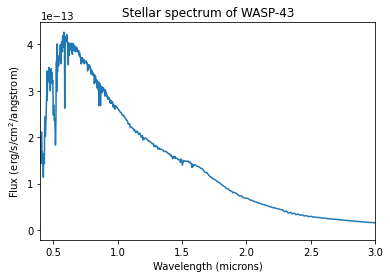

In [10]:
# Load the spectrum
teff = 4250
logg = 4.6
feh = -0.01
jmag = 8
star_wavelength, star_flux = np.load('niriss_soss_example_data/WASP-43_Jmag_8.npy')
star_spectrum = [star_wavelength * q.um, star_flux * q.erg / q.s / q.cm**2 / q.AA]

# Make the plot
plt.plot(star_wavelength, star_flux)
plt.xlim(0.4,3.)
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (erg/s/cm$^2$/angstrom)')
plt.title('Stellar spectrum of WASP-43')

## 2. Planet Data
---------------

Let's define a flat transit spectrum for WASP-43b.

In [23]:
# Transmission spectrum
planet_tspectrum = [star_wavelength * q.um, np.ones_like(star_wavelength) * 0.0136059394]

And now let's generate a transit model `tmodel` and its parameters `params` using `batman` so `mirage` can inject those into the PSFs themselves. 

We first get the properties of WASP-43b from Kreidberg et al. (2014), and inject those in the `params` object. Let's assume we will be observing the transit of WASP-43b which occurrs on `2459819.131474` (August 27, 2022 --- at about 15:09 UT; note the `yaml` file is set to observe around this time indeed): 

In [24]:
# Transit model with batman
params = batman.TransitParams()
params.t0 = 2459819.131474
params.per = 0.81347436
params.a = 4.87
params.inc = 82.10
params.ecc = 0.
params.w = 90.
params.limb_dark = 'quadratic'
params.u = [0.5,0.5]   # These are placeholders; they are changed internally
params.rp = 0.1166445  # These are placeholders; they are changed internally

Now create the `TransitModel` object; inject stellar info as well here. This is useful for calculating limb-darkening:

In [25]:
tmodel = batman.TransitModel(params, np.array([0.])) # Time array is placeholder, will be changed internally by MIRAGE
tmodel.teff, tmodel.logg, tmodel.feh = teff, logg, feh

## 3. Run `mirage` with `SossSim`

All right, now we ingest all this to `mirage` --- if you don't have `exoctk`, this will set limb-darkening to zero (which is what we want for now I believe!):

In [26]:
sim = SossSim(paramfile='niriss_soss_example_data/niriss_soss_substrip256_clear.yaml', \
              star=star_spectrum, planet=planet_tspectrum, tmodel=tmodel)

cannot import name 'modelgrid'
There was a problem computing those limb darkening coefficients. Using all zeros.
cannot import name 'modelgrid'
There was a problem computing those limb darkening coefficients. Using all zeros.


In [27]:
sim.info

{'target': 'WASP43',
 'ra': 154.91,
 'dec': -9.81,
 'title': 'WASP43 transit observation',
 'orders': [1, 2],
 'nresets': 1,
 'nints': 50,
 'ngrps': 6,
 'subarray': 'SUBSTRIP256',
 'filter': 'CLEAR',
 'obs_datetime': <Time object: scale='utc' format='iso' value=2022-08-27 12:49:00.000>,
 'nrows': 256,
 'ncols': 2048}

And, let's create the exposure! This should take a while:

In [29]:
sim.create()

2021-04-08 22:54:57,368 - mirage.soss_simulator - INFO - 
2021-04-08 22:54:57,368 - mirage.soss_simulator - INFO - 
2021-04-08 22:54:57,369 - mirage.soss_simulator - INFO - Running soss_simulator....
2021-04-08 22:54:57,370 - mirage.soss_simulator - INFO - 
2021-04-08 22:54:57,370 - mirage.soss_simulator - INFO - Using parameter file: 
2021-04-08 22:54:57,371 - mirage.soss_simulator - INFO - niriss_soss_example_data/niriss_soss_substrip256_clear.yaml
Simulating WASP43 in WASP43 transit observation
Configuration: SUBSTRIP256 + CLEAR
Groups: 6, Integrations: 50

Constructing frames for chunk 1/7...
Chunk 1/7 finished: 71.132 s
Constructing frames for chunk 2/7...
Chunk 2/7 finished: 59.606 s
Constructing frames for chunk 3/7...
Chunk 3/7 finished: 59.778 s
Constructing frames for chunk 4/7...
Chunk 4/7 finished: 65.525 s
Constructing frames for chunk 5/7...
Chunk 5/7 finished: 66.295 s
Constructing frames for chunk 6/7...
Chunk 6/7 finished: 61.518 s
Constructing frames for chunk 7/7...


2021-04-08 23:01:45,182 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits
2021-04-08 23:01:45,183 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits
2021-04-08 23:01:45,183 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits
2021-04-08 23:01:45,184 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits
2021-04-08 23:01:45,184 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits
2021-04-08 23:01:45,185 - mirage.dark.dark_prep - 

2021-04-08 23:01:51,961 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:01:51,961 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:01:51,993 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:01:51,993 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:01:52,270 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:52,270 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:52,272 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:52,272 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:52,284 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:01:52,284 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:01:52,692 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:01:52,692 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:01:52,702 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:01:52,702 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:01:52,775 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:52,775 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:52,778 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:52,778 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:52,791 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:01:52,791 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:01:53,161 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:01:53,161 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:01:53,170 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:01:53,170 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:01:53,278 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:53,278 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:53,280 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:53,280 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:53,293 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:01:53,293 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:01:53,468 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:01:53,468 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:01:53,480 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:01:53,480 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:01:53,589 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:53,589 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:53,591 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:01:53,591 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:01:53,607 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:01:53,607 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:01:53,608 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:01:53,608 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:01:53,610 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:01:53,610 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:01:53,611 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:01:53,611 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:01:53,612 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:01:53,612 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:01:56,185 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:01:56,185 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:01:56,260 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:01:56,260 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:01:56,371 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:56,371 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:01:56,373 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:56,373 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:01:56,388 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:01:56,388 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:01:57,157 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:01:57,157 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:01:57,159 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:01:57,159 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:01:57,159 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:01:57,160 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:01:57,160 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:01:57,160 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:01:57,162 - mirage.dark.dark_prep - INFO - File number 0 will be used for integrations [ 0  8 18 31]


2021-04-08 23:01:57,162 - stpipe - INFO - File number 0 will be used for integrations [ 0  8 18 31]


2021-04-08 23:01:57,162 - stpipe - INFO - File number 0 will be used for integrations [ 0  8 18 31]
2021-04-08 23:01:57,223 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-08 23:01:57,223 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-08 23:01:57,223 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits
2021-04-08 23:02:01,174 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:01,174 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:01,174 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:02:01,586 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:01,586 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:01,586 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:02:01,597 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:01,597 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:01,597 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:02:08,085 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:08,085 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:08,085 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:08,100 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:08,100 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:08,813 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:08,813 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:08,815 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:08,815 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:08,829 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:08,829 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:09,194 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:09,194 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:09,204 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:09,204 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:09,288 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:09,288 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:09,290 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:09,290 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:09,301 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:09,301 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:09,622 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:09,622 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:09,631 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:09,631 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:09,766 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:09,766 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:09,769 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:09,769 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:09,789 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:09,789 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:10,006 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:10,006 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:10,020 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:10,020 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:10,145 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:10,145 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:10,148 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:10,148 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:10,161 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:10,161 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:10,163 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:10,163 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:10,165 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:10,165 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:10,167 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:10,167 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:10,170 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:10,170 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:12,404 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:12,404 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:12,439 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:12,439 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:12,543 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:12,543 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:12,545 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:12,545 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:12,558 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:12,558 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:13,453 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:02:13,453 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:02:13,455 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:13,455 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:13,455 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:02:13,457 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:13,457 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:13,457 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:02:13,497 - mirage.dark.dark_prep - INFO - File number 1 will be used for integrations [12 34]


2021-04-08 23:02:13,497 - stpipe - INFO - File number 1 will be used for integrations [12 34]


2021-04-08 23:02:13,497 - stpipe - INFO - File number 1 will be used for integrations [12 34]
2021-04-08 23:02:13,536 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-08 23:02:13,536 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-08 23:02:13,536 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits
2021-04-08 23:02:17,861 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:17,861 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:17,861 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:02:18,293 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:18,293 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:18,293 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:02:18,304 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:18,304 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:18,304 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:02:22,318 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:22,318 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:22,318 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:22,328 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:22,328 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:22,867 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:22,867 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:22,869 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:22,869 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:22,881 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:22,881 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:23,223 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:23,223 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:23,232 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:23,232 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:23,313 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:23,313 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:23,316 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:23,316 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:23,333 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:23,333 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:23,594 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:23,594 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:23,603 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:23,603 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:23,698 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:23,698 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:23,700 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:23,700 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:23,714 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:23,714 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:23,871 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:23,871 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:23,882 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:23,882 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:24,024 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:24,024 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:24,028 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:24,028 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:24,050 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:24,050 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:24,052 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:24,052 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:24,053 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:24,053 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:24,054 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:24,054 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:24,056 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:24,056 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:26,298 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:26,298 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:26,335 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:26,335 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:26,434 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:26,434 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:26,437 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:26,437 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:26,450 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:26,450 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:27,078 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:02:27,078 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:02:27,080 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:27,080 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:27,080 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:02:27,082 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:27,082 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:27,082 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:02:27,095 - mirage.dark.dark_prep - INFO - File number 2 will be used for integrations [ 9 25 39 43]


2021-04-08 23:02:27,095 - stpipe - INFO - File number 2 will be used for integrations [ 9 25 39 43]


2021-04-08 23:02:27,095 - stpipe - INFO - File number 2 will be used for integrations [ 9 25 39 43]
2021-04-08 23:02:27,154 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-08 23:02:27,154 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-08 23:02:27,154 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits
2021-04-08 23:02:30,955 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:30,955 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:30,955 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:02:31,380 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:31,380 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:31,380 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:02:31,394 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:31,394 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:31,394 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:02:35,116 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:35,116 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:35,116 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:35,128 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:35,128 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:35,823 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:35,823 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:35,827 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:35,827 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:35,838 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:35,838 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:36,144 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:36,144 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:36,153 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:36,153 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:36,234 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:36,234 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:36,237 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:36,237 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:36,252 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:36,252 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:36,520 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:36,520 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:36,528 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:36,528 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:36,621 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:36,621 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:36,623 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:36,623 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:36,635 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:36,635 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:36,795 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:36,795 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:36,806 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:36,806 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:36,908 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:36,908 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:36,910 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:36,910 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:36,923 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:36,923 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:36,924 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:36,924 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:36,925 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:36,925 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:36,926 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:36,926 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:36,928 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:36,928 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:39,300 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:39,300 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:39,334 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:39,334 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:39,444 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:39,444 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:39,447 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:39,447 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:39,465 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:39,465 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:40,239 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:02:40,239 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:02:40,241 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:40,241 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:40,241 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:02:40,244 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:40,244 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:40,244 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:02:40,259 - mirage.dark.dark_prep - INFO - File number 3 will be used for integrations [ 3 13]


2021-04-08 23:02:40,259 - stpipe - INFO - File number 3 will be used for integrations [ 3 13]


2021-04-08 23:02:40,259 - stpipe - INFO - File number 3 will be used for integrations [ 3 13]
2021-04-08 23:02:40,300 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-08 23:02:40,300 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-08 23:02:40,300 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits
2021-04-08 23:02:44,061 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:44,061 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:44,061 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:02:44,464 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:44,464 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:44,464 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:02:44,477 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:44,477 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:44,477 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:02:48,661 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:48,661 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:48,661 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:02:48,671 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:48,671 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:02:49,253 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:49,253 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:49,255 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:49,255 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:49,267 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:49,267 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:02:49,577 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:49,577 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:02:49,586 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:49,586 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:02:49,672 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:49,672 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:49,675 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:49,675 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:49,693 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:49,693 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:02:49,985 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:49,985 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:02:49,994 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:49,994 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:02:50,084 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:50,084 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:50,088 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:50,088 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:50,104 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:50,104 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:02:50,284 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:50,284 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:02:50,295 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:50,295 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:02:50,386 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:50,386 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:50,389 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:50,389 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:02:50,401 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:50,401 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:02:50,402 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:50,402 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:02:50,403 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:50,403 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:02:50,404 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:50,404 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:02:50,405 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:50,405 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:02:52,521 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:52,521 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:02:52,564 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:52,564 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:02:52,664 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:52,664 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:02:52,667 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:52,667 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:02:52,680 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:52,680 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:02:53,369 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:02:53,369 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:02:53,371 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:53,371 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:02:53,371 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:02:53,373 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:53,373 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:02:53,373 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:02:53,385 - mirage.dark.dark_prep - INFO - File number 4 will be used for integrations [ 6 10 40 41 42]


2021-04-08 23:02:53,385 - stpipe - INFO - File number 4 will be used for integrations [ 6 10 40 41 42]


2021-04-08 23:02:53,385 - stpipe - INFO - File number 4 will be used for integrations [ 6 10 40 41 42]
2021-04-08 23:02:53,462 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-08 23:02:53,462 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-08 23:02:53,462 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits
2021-04-08 23:02:56,281 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:56,281 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:02:56,281 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:02:56,680 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:56,680 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:02:56,680 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:02:56,692 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:56,692 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:02:56,692 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:03:00,786 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:00,786 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:00,786 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:00,796 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:00,796 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:01,365 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:01,365 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:01,367 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:01,367 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:01,379 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:01,379 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:01,710 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:01,710 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:01,720 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:01,720 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:01,802 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:01,802 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:01,804 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:01,804 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:01,819 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:01,819 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:02,088 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:02,088 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:02,096 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:02,096 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:02,197 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:02,197 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:02,199 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:02,199 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:02,213 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:02,213 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:02,373 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:02,373 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:02,384 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:02,384 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:02,481 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:02,481 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:02,484 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:02,484 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:02,497 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:02,497 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:02,498 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:02,498 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:02,499 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:02,499 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:02,501 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:02,501 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:02,502 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:02,502 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:04,638 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:04,638 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:04,673 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:04,673 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:04,765 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:04,765 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:04,768 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:04,768 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:04,780 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:04,780 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:05,507 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:03:05,507 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:03:05,509 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:05,509 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:05,509 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:03:05,510 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:05,510 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:05,510 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:03:05,522 - mirage.dark.dark_prep - INFO - File number 5 will be used for integrations [ 1 35]


2021-04-08 23:03:05,522 - stpipe - INFO - File number 5 will be used for integrations [ 1 35]


2021-04-08 23:03:05,522 - stpipe - INFO - File number 5 will be used for integrations [ 1 35]
2021-04-08 23:03:05,555 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-08 23:03:05,555 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-08 23:03:05,555 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits
2021-04-08 23:03:08,408 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:08,408 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:08,408 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:03:08,887 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:08,887 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:08,887 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:03:08,901 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:08,901 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:08,901 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:03:12,889 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:12,889 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:12,889 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:12,899 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:12,899 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:13,444 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:13,444 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:13,446 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:13,446 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:13,458 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:13,458 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:13,771 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:13,771 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:13,783 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:13,783 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:13,866 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:13,866 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:13,869 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:13,869 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:13,881 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:13,881 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:14,145 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:14,145 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:14,156 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:14,156 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:14,267 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:14,267 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:14,269 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:14,269 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:14,281 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:14,281 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:14,472 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:14,472 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:14,486 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:14,486 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:14,596 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:14,596 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:14,600 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:14,600 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:14,611 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:14,611 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:14,614 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:14,614 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:14,615 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:14,615 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:14,617 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:14,617 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:14,618 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:14,618 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:16,733 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:16,733 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:16,766 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:16,766 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:16,871 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:16,871 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:16,873 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:16,873 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:16,890 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:16,890 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:17,508 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:03:17,508 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:03:17,509 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:17,509 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:17,509 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:03:17,511 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:17,511 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:17,511 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:03:17,521 - mirage.dark.dark_prep - INFO - File number 6 will be used for integrations [ 4 19 23]


2021-04-08 23:03:17,521 - stpipe - INFO - File number 6 will be used for integrations [ 4 19 23]


2021-04-08 23:03:17,521 - stpipe - INFO - File number 6 will be used for integrations [ 4 19 23]
2021-04-08 23:03:17,563 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-08 23:03:17,563 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-08 23:03:17,563 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits
2021-04-08 23:03:20,311 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:20,311 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:20,311 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:03:20,710 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:20,710 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:20,710 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:03:20,722 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:20,722 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:20,722 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:03:24,446 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:24,446 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:24,446 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:24,457 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:24,457 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:25,163 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:25,163 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:25,167 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:25,167 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:25,188 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:25,188 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:25,539 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:25,539 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:25,548 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:25,548 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:25,639 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:25,639 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:25,643 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:25,643 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:25,661 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:25,661 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:25,942 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:25,942 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:25,951 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:25,951 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:26,049 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:26,049 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:26,054 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:26,054 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:26,070 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:26,070 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:26,275 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:26,275 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:26,286 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:26,286 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:26,384 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:26,384 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:26,387 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:26,387 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:26,399 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:26,399 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:26,400 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:26,400 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:26,402 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:26,402 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:26,403 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:26,403 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:26,404 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:26,404 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:28,655 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:28,655 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:28,693 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:28,693 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:28,806 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:28,806 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:28,809 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:28,809 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:28,826 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:28,826 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:29,522 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:03:29,522 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:03:29,524 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:29,524 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:29,524 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:03:29,526 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:29,526 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:29,526 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:03:29,540 - mirage.dark.dark_prep - INFO - File number 7 will be used for integrations [30 46 48]


2021-04-08 23:03:29,540 - stpipe - INFO - File number 7 will be used for integrations [30 46 48]


2021-04-08 23:03:29,540 - stpipe - INFO - File number 7 will be used for integrations [30 46 48]
2021-04-08 23:03:29,591 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-08 23:03:29,591 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-08 23:03:29,591 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits
2021-04-08 23:03:32,468 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:32,468 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:32,468 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:03:32,896 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:32,896 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:32,896 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:03:32,911 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:32,911 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:32,911 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:03:36,720 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:36,720 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:36,720 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:36,730 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:36,730 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:37,274 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:37,274 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:37,278 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:37,278 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:37,295 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:37,295 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:37,655 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:37,655 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:37,665 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:37,665 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:37,746 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:37,746 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:37,749 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:37,749 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:37,763 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:37,763 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:38,019 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:38,019 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:38,027 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:38,027 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:38,122 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:38,122 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:38,125 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:38,125 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:38,138 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:38,138 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:38,296 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:38,296 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:38,307 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:38,307 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:38,405 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:38,405 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:38,408 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:38,408 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:38,421 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:38,421 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:38,422 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:38,422 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:38,423 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:38,423 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:38,424 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:38,424 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:38,425 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:38,425 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:40,523 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:40,523 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:40,559 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:40,559 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:40,685 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:40,685 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:40,688 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:40,688 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:40,706 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:40,706 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:41,356 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:03:41,356 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:03:41,358 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:41,358 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:41,358 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:03:41,359 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:41,359 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:41,359 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:03:41,371 - mirage.dark.dark_prep - INFO - File number 8 will be used for integrations [28]


2021-04-08 23:03:41,371 - stpipe - INFO - File number 8 will be used for integrations [28]


2021-04-08 23:03:41,371 - stpipe - INFO - File number 8 will be used for integrations [28]
2021-04-08 23:03:41,388 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-08 23:03:41,388 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-08 23:03:41,388 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits
2021-04-08 23:03:44,688 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:44,688 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:44,688 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:03:45,105 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:45,105 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:45,105 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:03:45,117 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:45,117 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:45,117 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:03:48,673 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:48,673 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:48,673 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:03:48,683 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:48,683 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:03:49,507 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:49,507 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:49,510 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:49,510 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:49,520 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:49,520 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:03:49,828 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:49,828 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:03:49,840 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:49,840 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:03:49,971 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:49,971 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:49,975 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:49,975 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:49,992 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:49,992 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:03:50,266 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:50,266 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:03:50,283 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:50,283 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:03:50,393 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:50,393 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:50,397 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:50,397 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:50,414 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:50,414 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:03:50,572 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:50,572 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:03:50,582 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:50,582 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:03:50,684 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:50,684 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:50,687 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:50,687 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:03:50,700 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:50,700 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:03:50,701 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:50,701 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:03:50,702 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:50,702 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:03:50,704 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:50,704 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:03:50,705 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:50,705 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:03:52,836 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:52,836 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:03:52,875 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:52,875 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:03:52,976 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:52,976 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:03:52,978 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:52,978 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:03:52,991 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:52,991 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:03:53,636 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:03:53,636 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:03:53,638 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:53,638 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:03:53,638 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:03:53,639 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:53,639 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:03:53,639 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:03:53,651 - mirage.dark.dark_prep - INFO - File number 9 will be used for integrations [17 33 47]


2021-04-08 23:03:53,651 - stpipe - INFO - File number 9 will be used for integrations [17 33 47]


2021-04-08 23:03:53,651 - stpipe - INFO - File number 9 will be used for integrations [17 33 47]
2021-04-08 23:03:53,700 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-08 23:03:53,700 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-08 23:03:53,700 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits
2021-04-08 23:03:57,198 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:57,198 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:03:57,198 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:03:57,611 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:57,611 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:03:57,611 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:03:57,623 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:57,623 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:03:57,623 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:04:01,879 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:01,879 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:01,879 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:01,889 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:01,889 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:02,451 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:02,451 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:02,454 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:02,454 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:02,469 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:02,469 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:02,835 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:02,835 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:02,845 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:02,845 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:02,926 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:02,926 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:02,928 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:02,928 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:02,943 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:02,943 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:03,204 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:03,204 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:03,212 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:03,212 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:03,308 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:03,308 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:03,310 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:03,310 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:03,324 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:03,324 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:03,483 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:03,483 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:03,493 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:03,493 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:03,586 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:03,586 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:03,589 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:03,589 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:03,605 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:03,605 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:03,607 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:03,607 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:03,608 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:03,608 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:03,610 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:03,610 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:03,611 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:03,611 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:05,721 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:05,721 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:05,760 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:05,760 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:05,854 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:05,854 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:05,858 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:05,858 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:05,878 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:05,878 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:06,585 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:04:06,585 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:04:06,586 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:06,586 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:06,586 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:04:06,588 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:06,588 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:06,588 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:04:06,600 - mirage.dark.dark_prep - INFO - File number 10 will be used for integrations [26]


2021-04-08 23:04:06,600 - stpipe - INFO - File number 10 will be used for integrations [26]


2021-04-08 23:04:06,600 - stpipe - INFO - File number 10 will be used for integrations [26]
2021-04-08 23:04:06,618 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-08 23:04:06,618 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-08 23:04:06,618 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits
2021-04-08 23:04:10,138 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:10,138 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:10,138 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:04:10,722 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:10,722 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:10,722 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:04:10,738 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:10,738 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:10,738 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:04:15,618 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:15,618 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:15,618 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:15,631 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:15,631 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:16,316 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:16,316 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:16,319 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:16,319 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:16,332 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:16,332 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:16,695 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:16,695 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:16,706 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:16,706 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:16,792 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:16,792 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:16,795 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:16,795 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:16,809 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:16,809 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:17,099 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:17,099 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:17,109 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:17,109 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:17,216 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:17,216 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:17,218 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:17,218 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:17,235 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:17,235 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:17,424 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:17,424 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:17,435 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:17,435 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:17,536 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:17,536 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:17,538 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:17,538 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:17,551 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:17,551 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:17,552 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:17,552 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:17,553 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:17,553 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:17,555 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:17,555 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:17,556 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:17,556 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:19,861 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:19,861 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:19,907 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:19,907 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:20,025 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:20,025 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:20,028 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:20,028 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:20,044 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:20,044 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:20,921 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:04:20,921 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:04:20,923 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:20,923 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:20,923 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:04:20,925 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:20,925 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:20,925 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:04:20,938 - mirage.dark.dark_prep - INFO - File number 11 will be used for integrations [44 45]


2021-04-08 23:04:20,938 - stpipe - INFO - File number 11 will be used for integrations [44 45]


2021-04-08 23:04:20,938 - stpipe - INFO - File number 11 will be used for integrations [44 45]
2021-04-08 23:04:20,974 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-08 23:04:20,974 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-08 23:04:20,974 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits
2021-04-08 23:04:24,160 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:24,160 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:24,160 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:04:24,700 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:24,700 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:24,700 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:04:24,732 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:24,732 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:24,732 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:04:28,696 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:28,696 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:28,696 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:28,707 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:28,707 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:29,353 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:29,353 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:29,356 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:29,356 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:29,371 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:29,371 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:29,746 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:29,746 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:29,758 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:29,758 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:29,842 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:29,842 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:29,846 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:29,846 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:29,872 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:29,872 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:30,188 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:30,188 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:30,205 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:30,205 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:30,298 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:30,298 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:30,300 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:30,300 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:30,319 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:30,319 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:30,520 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:30,520 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:30,533 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:30,533 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:30,631 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:30,631 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:30,635 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:30,635 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:30,658 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:30,658 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:30,660 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:30,660 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:30,661 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:30,661 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:30,663 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:30,663 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:30,664 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:30,664 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:32,942 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:32,942 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:32,978 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:32,978 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:33,074 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:33,074 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:33,077 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:33,077 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:33,090 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:33,090 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:33,771 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:04:33,771 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:04:33,774 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:33,774 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:33,774 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:04:33,777 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:33,777 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:33,777 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:04:33,791 - mirage.dark.dark_prep - INFO - File number 12 will be used for integrations [ 2 14 27 36]


2021-04-08 23:04:33,791 - stpipe - INFO - File number 12 will be used for integrations [ 2 14 27 36]


2021-04-08 23:04:33,791 - stpipe - INFO - File number 12 will be used for integrations [ 2 14 27 36]
2021-04-08 23:04:33,855 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-08 23:04:33,855 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-08 23:04:33,855 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits
2021-04-08 23:04:37,393 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:37,393 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:37,393 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:04:37,813 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:37,813 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:37,813 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:04:37,825 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:37,825 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:37,825 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:04:42,054 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:42,054 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:42,054 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:42,067 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:42,067 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:42,794 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:42,794 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:42,798 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:42,798 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:42,815 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:42,815 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:43,181 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:43,181 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:43,190 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:43,190 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:43,279 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:43,279 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:43,281 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:43,281 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:43,298 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:43,298 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:43,632 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:43,632 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:43,643 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:43,643 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:43,752 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:43,752 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:43,755 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:43,755 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:43,769 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:43,769 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:43,961 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:43,961 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:43,972 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:43,972 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:44,079 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:44,079 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:44,081 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:44,081 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:44,095 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:44,095 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:44,097 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:44,097 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:44,099 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:44,099 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:44,100 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:44,100 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:44,102 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:44,102 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:46,566 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:46,566 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:04:46,599 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:46,599 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:04:46,694 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:46,694 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:46,696 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:46,696 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:46,709 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:46,709 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:04:47,493 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:04:47,493 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:04:47,495 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:47,495 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:04:47,495 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:04:47,497 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:47,497 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:04:47,497 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:04:47,518 - mirage.dark.dark_prep - INFO - File number 13 will be used for integrations [20 21]


2021-04-08 23:04:47,518 - stpipe - INFO - File number 13 will be used for integrations [20 21]


2021-04-08 23:04:47,518 - stpipe - INFO - File number 13 will be used for integrations [20 21]
2021-04-08 23:04:47,549 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-08 23:04:47,549 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-08 23:04:47,549 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits
2021-04-08 23:04:50,804 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:50,804 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:04:50,804 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:04:51,374 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:51,374 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:04:51,374 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:04:51,388 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:51,388 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:04:51,388 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:04:55,700 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:55,700 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:55,700 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:04:55,711 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:55,711 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:04:56,450 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:56,450 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:56,455 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:56,455 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:56,467 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:56,467 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:04:56,935 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:56,935 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:04:56,945 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:56,945 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:04:57,033 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:57,033 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:57,038 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:57,038 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:57,059 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:57,059 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:04:57,505 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:57,505 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:04:57,515 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:57,515 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:04:57,628 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:57,628 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:57,631 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:57,631 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:04:57,643 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:57,643 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:04:57,867 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:57,867 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:04:57,885 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:57,885 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:04:57,984 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:57,984 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:04:57,986 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:57,986 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:04:57,998 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:57,998 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:04:58,000 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:58,000 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:04:58,001 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:58,001 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:04:58,002 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:58,002 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:04:58,003 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:04:58,003 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:00,367 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:00,367 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:00,423 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:00,423 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:00,521 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:00,521 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:00,524 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:00,524 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:00,537 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:00,537 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:01,265 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:05:01,265 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:05:01,267 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:01,267 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:01,267 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:05:01,269 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:01,269 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:01,269 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:05:01,281 - mirage.dark.dark_prep - INFO - File number 14 will be used for integrations [29 49]


2021-04-08 23:05:01,281 - stpipe - INFO - File number 14 will be used for integrations [29 49]


2021-04-08 23:05:01,281 - stpipe - INFO - File number 14 will be used for integrations [29 49]
2021-04-08 23:05:01,314 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-08 23:05:01,314 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-08 23:05:01,314 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits
2021-04-08 23:05:04,946 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:04,946 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:04,946 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:05:05,504 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:05,504 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:05,504 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:05:05,520 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:05,520 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:05,520 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:05:09,144 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:09,144 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:09,144 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:09,158 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:09,158 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:09,806 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:09,806 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:09,809 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:09,809 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:09,820 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:09,820 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:10,149 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:10,149 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:10,160 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:10,160 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:10,247 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:10,247 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:10,251 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:10,251 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:10,264 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:10,264 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:10,537 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:10,537 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:10,547 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:10,547 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:10,654 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:10,654 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:10,656 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:10,656 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:10,669 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:10,669 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:10,836 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:10,836 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:10,848 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:10,848 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:10,952 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:10,952 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:10,954 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:10,954 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:10,967 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:10,967 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:10,968 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:10,968 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:10,970 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:10,970 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:10,971 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:10,971 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:10,972 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:10,972 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:13,254 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:13,254 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:13,293 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:13,293 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:13,391 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:13,391 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:13,394 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:13,394 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:13,414 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:13,414 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:14,077 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:05:14,077 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:05:14,078 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:14,078 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:14,078 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:05:14,080 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:14,080 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:14,080 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:05:14,092 - mirage.dark.dark_prep - INFO - File number 15 will be used for integrations [ 7 22 24 38]


2021-04-08 23:05:14,092 - stpipe - INFO - File number 15 will be used for integrations [ 7 22 24 38]


2021-04-08 23:05:14,092 - stpipe - INFO - File number 15 will be used for integrations [ 7 22 24 38]
2021-04-08 23:05:14,149 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-08 23:05:14,149 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-08 23:05:14,149 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits
2021-04-08 23:05:17,744 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:17,744 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:17,744 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:05:18,167 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:18,167 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:18,167 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:05:18,179 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:18,179 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:18,179 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:05:21,090 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:21,090 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:21,090 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:21,102 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:21,102 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:21,758 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:21,758 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:21,760 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:21,760 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:21,772 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:21,772 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:22,094 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:22,094 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:22,104 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:22,104 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:22,187 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:22,187 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:22,190 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:22,190 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:22,204 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:22,204 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:22,465 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:22,465 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:22,473 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:22,473 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:22,587 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:22,587 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:22,589 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:22,589 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:22,602 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:22,602 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:22,784 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:22,784 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:22,801 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:22,801 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:22,908 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:22,908 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:22,913 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:22,913 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:22,925 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:22,925 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:22,926 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:22,926 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:22,927 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:22,927 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:22,930 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:22,930 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:22,931 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:22,931 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:25,192 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:25,192 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:25,227 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:25,227 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:25,334 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:25,334 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:25,337 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:25,337 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:25,349 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:25,349 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:26,059 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:05:26,059 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:05:26,061 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:26,061 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:26,061 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:05:26,063 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:26,063 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:26,063 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:05:26,075 - mirage.dark.dark_prep - INFO - File number 16 will be used for integrations [32]


2021-04-08 23:05:26,075 - stpipe - INFO - File number 16 will be used for integrations [32]


2021-04-08 23:05:26,075 - stpipe - INFO - File number 16 will be used for integrations [32]
2021-04-08 23:05:26,092 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-08 23:05:26,092 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-08 23:05:26,092 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits
2021-04-08 23:05:29,752 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:29,752 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:29,752 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:05:30,302 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:30,302 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:30,302 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:05:30,314 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:30,314 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:30,314 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:05:33,143 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:33,143 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:33,143 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:33,155 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:33,155 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:33,813 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:33,813 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:33,816 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:33,816 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:33,833 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:33,833 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:34,151 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:34,151 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:34,168 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:34,168 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:34,250 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:34,250 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:34,255 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:34,255 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:34,272 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:34,272 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:34,549 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:34,549 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:34,559 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:34,559 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:34,658 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:34,658 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:34,660 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:34,660 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:34,673 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:34,673 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:34,831 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:34,831 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:34,842 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:34,842 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:34,941 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:34,941 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:34,943 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:34,943 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:34,956 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:34,956 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:34,958 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:34,958 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:34,959 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:34,959 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:34,960 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:34,960 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:34,962 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:34,962 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:37,211 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:37,211 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:37,252 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:37,252 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:37,360 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:37,360 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:37,362 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:37,362 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:37,376 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:37,376 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:38,084 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:05:38,084 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:05:38,086 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:38,086 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:38,086 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:05:38,088 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:38,088 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:38,088 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:05:38,110 - mirage.dark.dark_prep - INFO - File number 17 will be used for integrations [16]


2021-04-08 23:05:38,110 - stpipe - INFO - File number 17 will be used for integrations [16]


2021-04-08 23:05:38,110 - stpipe - INFO - File number 17 will be used for integrations [16]
2021-04-08 23:05:38,127 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-08 23:05:38,127 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-08 23:05:38,127 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits
2021-04-08 23:05:41,902 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:41,902 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.


2021-04-08 23:05:41,902 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.
2021-04-08 23:05:42,321 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:42,321 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-08 23:05:42,321 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-08 23:05:42,334 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:42,334 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-08 23:05:42,334 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-08 23:05:45,062 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:45,062 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:45,062 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-08 23:05:45,074 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:45,074 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-08 23:05:45,775 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:45,775 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:45,778 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:45,778 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:45,800 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:45,800 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-08 23:05:46,195 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:46,195 - stpipe.dq_init - INFO - Step dq_init done


2021-04-08 23:05:46,209 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:46,209 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-08 23:05:46,307 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:46,307 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:46,309 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:46,309 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:46,322 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:46,322 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-08 23:05:46,586 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:46,586 - stpipe.saturation - INFO - Step saturation done


2021-04-08 23:05:46,598 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:46,598 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-08 23:05:46,699 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:46,699 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:46,703 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:46,703 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:46,722 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:46,722 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-08 23:05:46,922 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:46,922 - stpipe.superbias - INFO - Step superbias done


2021-04-08 23:05:46,936 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:46,936 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-08 23:05:47,045 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:47,045 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:47,049 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:47,049 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-08 23:05:47,066 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:47,066 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-08 23:05:47,068 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:47,068 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-08 23:05:47,070 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:47,070 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-08 23:05:47,071 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:47,071 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-08 23:05:47,073 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:47,073 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-08 23:05:49,242 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:49,242 - stpipe.refpix - INFO - Step refpix done


2021-04-08 23:05:49,293 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:49,293 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-08 23:05:49,388 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:49,388 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-08 23:05:49,391 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:49,391 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-08 23:05:49,403 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:49,403 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-08 23:05:50,040 - stpipe.linearity - INFO - Step linearity done


2021-04-08 23:05:50,040 - stpipe.linearity - INFO - Step linearity done
2021-04-08 23:05:50,042 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:50,042 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-08 23:05:50,042 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-08 23:05:50,043 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:50,043 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-08 23:05:50,043 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-08 23:05:50,055 - mirage.dark.dark_prep - INFO - File number 18 will be used for integrations [ 5 11 15 37]


2021-04-08 23:05:50,055 - stpipe - INFO - File number 18 will be used for integrations [ 5 11 15 37]


2021-04-08 23:05:50,055 - stpipe - INFO - File number 18 will be used for integrations [ 5 11 15 37]
2021-04-08 23:05:50,118 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-08 23:05:50,118 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-08 23:05:50,118 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits
2021-04-08 23:05:55,519 - mirage.dark.dark_prep - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal_linear_dark_prep_object.fits. This can be used as input to the observation generator.


2021-04-08 23:05:55,519 - stpipe - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal_linear_dark_prep_object.fits. This can be used as input to the observation generator.


2021-04-08 23:05:55,519 - stpipe - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal_linear_dark_prep_object.fits. This can be used as input to the observation generator.
2021-04-08 23:05:55,522 - mirage.dark.dark_prep - INFO - 


2021-04-08 23:05:55,522 - stpipe - INFO - 


2021-04-08 23:05:55,522 - stpipe - INFO - 
2021-04-08 23:05:55,524 - mirage.dark.dark_prep - INFO - 


2021-04-08 23:05:55,524 - stpipe - INFO - 


2021-04-08 23:05:55,524 - stpipe - INFO - 
2021-04-08 23:05:55,526 - mirage.dark.dark_prep - INFO - Segment 1 out of 1 complete.


2021-04-08 23:05:55,526 - stpipe - INFO - Segment 1 out of 1 complete.


2021-04-08 23:05:55,526 - stpipe - INFO - Segment 1 out of 1 complete.
2021-04-08 23:05:55,537 - mirage.soss_simulator - INFO - Running observation generator


2021-04-08 23:05:55,537 - stpipe - INFO - Running observation generator


2021-04-08 23:05:55,537 - stpipe - INFO - Running observation generator
2021-04-08 23:05:59,595 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:05:59,595 - stpipe - INFO - 


2021-04-08 23:05:59,595 - stpipe - INFO - 
2021-04-08 23:05:59,598 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:05:59,598 - stpipe - INFO - 


2021-04-08 23:05:59,598 - stpipe - INFO - 
2021-04-08 23:05:59,601 - mirage.ramp_generator.obs_generator - INFO - Running observation generator....


2021-04-08 23:05:59,601 - stpipe - INFO - Running observation generator....


2021-04-08 23:05:59,601 - stpipe - INFO - Running observation generator....
2021-04-08 23:05:59,605 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:05:59,605 - stpipe - INFO - 


2021-04-08 23:05:59,605 - stpipe - INFO - 
2021-04-08 23:05:59,607 - mirage.ramp_generator.obs_generator - INFO - Reading parameter file: niriss_soss_example_data/niriss_soss_substrip256_clear.yaml


2021-04-08 23:05:59,607 - stpipe - INFO - Reading parameter file: niriss_soss_example_data/niriss_soss_substrip256_clear.yaml


2021-04-08 23:05:59,607 - stpipe - INFO - Reading parameter file: niriss_soss_example_data/niriss_soss_substrip256_clear.yaml
2021-04-08 23:05:59,610 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:05:59,610 - stpipe - INFO - 


2021-04-08 23:05:59,610 - stpipe - INFO - 
2021-04-08 23:05:59,613 - mirage.ramp_generator.obs_generator - INFO - Original log file name: ./mirage_latest.log


2021-04-08 23:05:59,613 - stpipe - INFO - Original log file name: ./mirage_latest.log


2021-04-08 23:05:59,613 - stpipe - INFO - Original log file name: ./mirage_latest.log
2021-04-08 23:05:59,617 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.


2021-04-08 23:05:59,617 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.


2021-04-08 23:05:59,617 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.
2021-04-08 23:05:59,622 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.


2021-04-08 23:05:59,622 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.


2021-04-08 23:05:59,622 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.
2021-04-08 23:05:59,627 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.


2021-04-08 23:05:59,627 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.


2021-04-08 23:05:59,627 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.
2021-04-08 23:05:59,631 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.


2021-04-08 23:05:59,631 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.


2021-04-08 23:05:59,631 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.
2021-04-08 23:05:59,635 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.


2021-04-08 23:05:59,635 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.


2021-04-08 23:05:59,635 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.
2021-04-08 23:05:59,640 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.


2021-04-08 23:05:59,640 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.


2021-04-08 23:05:59,640 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.
2021-04-08 23:05:59,643 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.


2021-04-08 23:05:59,643 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.


2021-04-08 23:05:59,643 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.
2021-04-08 23:05:59,646 - mirage.utils.utils.full_paths - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits


2021-04-08 23:05:59,646 - stpipe - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits


2021-04-08 23:05:59,646 - stpipe - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits
2021-04-08 23:05:59,648 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.


2021-04-08 23:05:59,648 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.


2021-04-08 23:05:59,648 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.
2021-04-08 23:05:59,651 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file


2021-04-08 23:05:59,651 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file


2021-04-08 23:05:59,651 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file
2021-04-08 23:05:59,654 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.


2021-04-08 23:05:59,654 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.


2021-04-08 23:05:59,654 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.
2021-04-08 23:05:59,656 - mirage.utils.utils.full_paths - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"


2021-04-08 23:05:59,656 - stpipe - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"


2021-04-08 23:05:59,656 - stpipe - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"
2021-04-08 23:05:59,659 - mirage.utils.utils.full_paths - INFO - From grism library, found None as the POM transmission file.


2021-04-08 23:05:59,659 - stpipe - INFO - From grism library, found None as the POM transmission file.


2021-04-08 23:05:59,659 - stpipe - INFO - From grism library, found None as the POM transmission file.
2021-04-08 23:05:59,661 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file


2021-04-08 23:05:59,661 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file


2021-04-08 23:05:59,661 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file
2021-04-08 23:05:59,664 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file


2021-04-08 23:05:59,664 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file


2021-04-08 23:05:59,664 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file
2021-04-08 23:05:59,666 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file


2021-04-08 23:05:59,666 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file


2021-04-08 23:05:59,666 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file
2021-04-08 23:05:59,668 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file


2021-04-08 23:05:59,668 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file


2021-04-08 23:05:59,668 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file
2021-04-08 23:05:59,670 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file


2021-04-08 23:05:59,670 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file


2021-04-08 23:05:59,670 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file
2021-04-08 23:05:59,673 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_filter_and_pupil_wheel_positions.txt for Reffiles:filter_wheel_positions input file


2021-04-08 23:05:59,673 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_filter_and_pupil_wheel_positions.txt for Reffiles:filter_wheel_positions input file


2021-04-08 23:05:59,673 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_filter_and_pupil_wheel_positions.txt for Reffiles:filter_wheel_positions input file
2021-04-08 23:05:59,675 - mirage.utils.utils.full_paths - INFO - Reffiles:photom field not present in input. Setting equal to "crds"


2021-04-08 23:05:59,675 - stpipe - INFO - Reffiles:photom field not present in input. Setting equal to "crds"


2021-04-08 23:05:59,675 - stpipe - INFO - Reffiles:photom field not present in input. Setting equal to "crds"
2021-04-08 23:05:59,678 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.


2021-04-08 23:05:59,678 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.


2021-04-08 23:05:59,678 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.
2021-04-08 23:05:59,680 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file


2021-04-08 23:05:59,680 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file


2021-04-08 23:05:59,680 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file
2021-04-08 23:05:59,682 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file


2021-04-08 23:05:59,682 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file


2021-04-08 23:05:59,682 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file
2021-04-08 23:05:59,685 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file


2021-04-08 23:05:59,685 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file


2021-04-08 23:05:59,685 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file
2021-04-08 23:05:59,687 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file


2021-04-08 23:05:59,687 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file


2021-04-08 23:05:59,687 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file
2021-04-08 23:05:59,690 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file


2021-04-08 23:05:59,690 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file


2021-04-08 23:05:59,690 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file
2021-04-08 23:05:59,692 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file


2021-04-08 23:05:59,692 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file


2021-04-08 23:05:59,692 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file
2021-04-08 23:05:59,695 - mirage.ramp_generator.obs_generator - INFO - Reading in dark file: /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal_linear_dark_prep_object.fits


2021-04-08 23:05:59,695 - stpipe - INFO - Reading in dark file: /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal_linear_dark_prep_object.fits


2021-04-08 23:05:59,695 - stpipe - INFO - Reading in dark file: /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal_linear_dark_prep_object.fits
2021-04-08 23:05:59,782 - mirage.ramp_generator.obs_generator - INFO - Requested readout pattern NISRAPID is valid. Using nframe = 1 and nskip = 0


2021-04-08 23:05:59,782 - stpipe - INFO - Requested readout pattern NISRAPID is valid. Using nframe = 1 and nskip = 0


2021-04-08 23:05:59,782 - stpipe - INFO - Requested readout pattern NISRAPID is valid. Using nframe = 1 and nskip = 0
2021-04-08 23:05:59,935 - mirage.ramp_generator.obs_generator - INFO - Frametime is 5.494000000000001


2021-04-08 23:05:59,935 - stpipe - INFO - Frametime is 5.494000000000001


2021-04-08 23:05:59,935 - stpipe - INFO - Frametime is 5.494000000000001
2021-04-08 23:05:59,937 - mirage.ramp_generator.obs_generator - INFO - Base cosmic ray probability per pixel per second: 1.587e-05


2021-04-08 23:05:59,937 - stpipe - INFO - Base cosmic ray probability per pixel per second: 1.587e-05


2021-04-08 23:05:59,937 - stpipe - INFO - Base cosmic ray probability per pixel per second: 1.587e-05
2021-04-08 23:06:00,664 - mirage.ramp_generator.obs_generator - INFO - Integration 0:


2021-04-08 23:06:00,664 - stpipe - INFO - Integration 0:


2021-04-08 23:06:00,664 - stpipe - INFO - Integration 0:
2021-04-08 23:06:00,758 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:00,758 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:00,758 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:00,880 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:00,880 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:00,880 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:00,947 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:00,947 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:00,947 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:01,009 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:01,009 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:01,009 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:01,066 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:01,066 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:01,066 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:01,129 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:01,129 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:01,129 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:01,155 - mirage.ramp_generator.obs_generator - INFO - Integration 1:


2021-04-08 23:06:01,155 - stpipe - INFO - Integration 1:


2021-04-08 23:06:01,155 - stpipe - INFO - Integration 1:
2021-04-08 23:06:01,220 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:01,220 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:01,220 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:01,275 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:01,275 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:01,275 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:01,327 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:01,327 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:01,327 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:01,378 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:01,378 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:01,378 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:01,443 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:01,443 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:01,443 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:01,531 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:01,531 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:01,531 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:01,550 - mirage.ramp_generator.obs_generator - INFO - Integration 2:


2021-04-08 23:06:01,550 - stpipe - INFO - Integration 2:


2021-04-08 23:06:01,550 - stpipe - INFO - Integration 2:
2021-04-08 23:06:01,617 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:01,617 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:01,617 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:01,673 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:01,673 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:01,673 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:01,726 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:01,726 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:01,726 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:01,775 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:01,775 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:01,775 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:01,824 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:01,824 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:01,824 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:01,871 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:01,871 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:01,871 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:01,893 - mirage.ramp_generator.obs_generator - INFO - Integration 3:


2021-04-08 23:06:01,893 - stpipe - INFO - Integration 3:


2021-04-08 23:06:01,893 - stpipe - INFO - Integration 3:
2021-04-08 23:06:01,953 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:01,953 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:01,953 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:02,003 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,003 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,003 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:02,049 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,049 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,049 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:02,096 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:02,096 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:02,096 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:02,141 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:02,141 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:02,141 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:02,187 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:02,187 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:02,187 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:02,207 - mirage.ramp_generator.obs_generator - INFO - Integration 4:


2021-04-08 23:06:02,207 - stpipe - INFO - Integration 4:


2021-04-08 23:06:02,207 - stpipe - INFO - Integration 4:
2021-04-08 23:06:02,264 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:02,264 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:02,264 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:02,306 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,306 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,306 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:02,352 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,352 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,352 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:02,399 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:02,399 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:02,399 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:02,439 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:02,439 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:02,439 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:02,478 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:02,478 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:02,478 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:02,499 - mirage.ramp_generator.obs_generator - INFO - Integration 5:


2021-04-08 23:06:02,499 - stpipe - INFO - Integration 5:


2021-04-08 23:06:02,499 - stpipe - INFO - Integration 5:
2021-04-08 23:06:02,551 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:02,551 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:02,551 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:02,594 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,594 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,594 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:02,636 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,636 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,636 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:02,681 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:02,681 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:02,681 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:02,725 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:02,725 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:02,725 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:02,778 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:02,778 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:02,778 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:02,799 - mirage.ramp_generator.obs_generator - INFO - Integration 6:


2021-04-08 23:06:02,799 - stpipe - INFO - Integration 6:


2021-04-08 23:06:02,799 - stpipe - INFO - Integration 6:
2021-04-08 23:06:02,861 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:02,861 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:02,861 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:02,912 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,912 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:02,912 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:02,958 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,958 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:02,958 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:03,000 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,000 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,000 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:03,052 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,052 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,052 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:03,107 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,107 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,107 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:03,129 - mirage.ramp_generator.obs_generator - INFO - Integration 7:


2021-04-08 23:06:03,129 - stpipe - INFO - Integration 7:


2021-04-08 23:06:03,129 - stpipe - INFO - Integration 7:
2021-04-08 23:06:03,177 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:03,177 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:03,177 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:03,218 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:03,218 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:03,218 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:03,258 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:03,258 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:03,258 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:03,310 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,310 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,310 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:03,350 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,350 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,350 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:03,395 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,395 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,395 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:03,417 - mirage.ramp_generator.obs_generator - INFO - Integration 8:


2021-04-08 23:06:03,417 - stpipe - INFO - Integration 8:


2021-04-08 23:06:03,417 - stpipe - INFO - Integration 8:
2021-04-08 23:06:03,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:03,474 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:03,474 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:03,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:03,541 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:03,541 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:03,579 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:03,579 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:03,579 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:03,620 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,620 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,620 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:03,661 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,661 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,661 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:03,701 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,701 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,701 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:03,722 - mirage.ramp_generator.obs_generator - INFO - Integration 9:


2021-04-08 23:06:03,722 - stpipe - INFO - Integration 9:


2021-04-08 23:06:03,722 - stpipe - INFO - Integration 9:
2021-04-08 23:06:03,769 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:03,769 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:03,769 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:03,809 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:03,809 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:03,809 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:03,855 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:03,855 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:03,855 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:03,900 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,900 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:03,900 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:03,941 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,941 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:03,941 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:03,985 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,985 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:03,985 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:04,008 - mirage.ramp_generator.obs_generator - INFO - Integration 10:


2021-04-08 23:06:04,008 - stpipe - INFO - Integration 10:


2021-04-08 23:06:04,008 - stpipe - INFO - Integration 10:
2021-04-08 23:06:04,058 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,058 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,058 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:04,096 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,096 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,096 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:04,135 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,135 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,135 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:04,176 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,176 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,176 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:04,215 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:04,215 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:04,215 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:04,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:04,255 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:04,255 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:04,278 - mirage.ramp_generator.obs_generator - INFO - Integration 11:


2021-04-08 23:06:04,278 - stpipe - INFO - Integration 11:


2021-04-08 23:06:04,278 - stpipe - INFO - Integration 11:
2021-04-08 23:06:04,326 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,326 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,326 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:04,364 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,364 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,364 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:04,404 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,404 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,404 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:04,448 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,448 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,448 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:04,491 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:04,491 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:04,491 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:04,530 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:04,530 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:04,530 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:04,552 - mirage.ramp_generator.obs_generator - INFO - Integration 12:


2021-04-08 23:06:04,552 - stpipe - INFO - Integration 12:


2021-04-08 23:06:04,552 - stpipe - INFO - Integration 12:
2021-04-08 23:06:04,601 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,601 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,601 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:04,640 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,640 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,640 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:04,680 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,680 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,680 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:04,719 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,719 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,719 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:04,757 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:04,757 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:04,757 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:04,796 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:04,796 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:04,796 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:04,816 - mirage.ramp_generator.obs_generator - INFO - Integration 13:


2021-04-08 23:06:04,816 - stpipe - INFO - Integration 13:


2021-04-08 23:06:04,816 - stpipe - INFO - Integration 13:
2021-04-08 23:06:04,864 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,864 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:04,864 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:04,904 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,904 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:04,904 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:04,944 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,944 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:04,944 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:04,980 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,980 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:04,980 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:05,019 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,019 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,019 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:05,060 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,060 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,060 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:05,082 - mirage.ramp_generator.obs_generator - INFO - Integration 14:


2021-04-08 23:06:05,082 - stpipe - INFO - Integration 14:


2021-04-08 23:06:05,082 - stpipe - INFO - Integration 14:
2021-04-08 23:06:05,148 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:05,148 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:05,148 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:05,200 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:05,200 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:05,200 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:05,243 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:05,243 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:05,243 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:05,281 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:05,281 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:05,281 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:05,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,319 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,319 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:05,360 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,360 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,360 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:05,384 - mirage.ramp_generator.obs_generator - INFO - Integration 15:


2021-04-08 23:06:05,384 - stpipe - INFO - Integration 15:


2021-04-08 23:06:05,384 - stpipe - INFO - Integration 15:
2021-04-08 23:06:05,435 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:05,435 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:05,435 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:05,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:05,474 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:05,474 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:05,514 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:05,514 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:05,514 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:05,554 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:05,554 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:05,554 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:05,591 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,591 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,591 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:05,630 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,630 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,630 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:05,652 - mirage.ramp_generator.obs_generator - INFO - Integration 16:


2021-04-08 23:06:05,652 - stpipe - INFO - Integration 16:


2021-04-08 23:06:05,652 - stpipe - INFO - Integration 16:
2021-04-08 23:06:05,703 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:05,703 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:05,703 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:05,743 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:05,743 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:05,743 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:05,796 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:05,796 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:05,796 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:05,846 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:05,846 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:05,846 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:05,897 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,897 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:05,897 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:05,952 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,952 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:05,952 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:05,980 - mirage.ramp_generator.obs_generator - INFO - Integration 17:


2021-04-08 23:06:05,980 - stpipe - INFO - Integration 17:


2021-04-08 23:06:05,980 - stpipe - INFO - Integration 17:
2021-04-08 23:06:06,041 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:06,041 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:06,041 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:06,093 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:06,093 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:06,093 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:06,145 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:06,145 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:06,145 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:06,196 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:06,196 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:06,196 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:06,248 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:06,248 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:06,248 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:06,306 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:06,306 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:06,306 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:06,339 - mirage.ramp_generator.obs_generator - INFO - Integration 18:


2021-04-08 23:06:06,339 - stpipe - INFO - Integration 18:


2021-04-08 23:06:06,339 - stpipe - INFO - Integration 18:
2021-04-08 23:06:06,402 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:06,402 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:06,402 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:06,458 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:06,458 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:06,458 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:06,509 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:06,509 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:06,509 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:06,556 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:06,556 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:06,556 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:06,603 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:06,603 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:06,603 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:06,644 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:06,644 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:06,644 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:06,666 - mirage.ramp_generator.obs_generator - INFO - Integration 19:


2021-04-08 23:06:06,666 - stpipe - INFO - Integration 19:


2021-04-08 23:06:06,666 - stpipe - INFO - Integration 19:
2021-04-08 23:06:06,720 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:06,720 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:06,720 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:06,767 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:06,767 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:06,767 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:06,819 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:06,819 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:06,819 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:06,871 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:06,871 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:06,871 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:06,915 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:06,915 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:06,915 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:06,956 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:06,956 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:06,956 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:06,979 - mirage.ramp_generator.obs_generator - INFO - Integration 20:


2021-04-08 23:06:06,979 - stpipe - INFO - Integration 20:


2021-04-08 23:06:06,979 - stpipe - INFO - Integration 20:
2021-04-08 23:06:07,033 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,033 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,033 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:07,078 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,078 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,078 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:07,121 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,121 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,121 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:07,175 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:07,175 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:07,175 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:07,234 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:07,234 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:07,234 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:07,275 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:07,275 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:07,275 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:07,297 - mirage.ramp_generator.obs_generator - INFO - Integration 21:


2021-04-08 23:06:07,297 - stpipe - INFO - Integration 21:


2021-04-08 23:06:07,297 - stpipe - INFO - Integration 21:
2021-04-08 23:06:07,344 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,344 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,344 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:07,384 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,384 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,384 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:07,425 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,425 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,425 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:07,465 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:07,465 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:07,465 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:07,504 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:07,504 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:07,504 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:07,548 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:07,548 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:07,548 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:07,578 - mirage.ramp_generator.obs_generator - INFO - Integration 22:


2021-04-08 23:06:07,578 - stpipe - INFO - Integration 22:


2021-04-08 23:06:07,578 - stpipe - INFO - Integration 22:
2021-04-08 23:06:07,626 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,626 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,626 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:07,666 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,666 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,666 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:07,706 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,706 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,706 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:07,747 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:07,747 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:07,747 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:07,787 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:07,787 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:07,787 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:07,829 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:07,829 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:07,829 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:07,856 - mirage.ramp_generator.obs_generator - INFO - Integration 23:


2021-04-08 23:06:07,856 - stpipe - INFO - Integration 23:


2021-04-08 23:06:07,856 - stpipe - INFO - Integration 23:
2021-04-08 23:06:07,904 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,904 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:07,904 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:07,943 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,943 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:07,943 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:07,984 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,984 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:07,984 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:08,024 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,024 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,024 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:08,068 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:08,068 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:08,068 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:08,116 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:08,116 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:08,116 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:08,163 - mirage.ramp_generator.obs_generator - INFO - Integration 24:


2021-04-08 23:06:08,163 - stpipe - INFO - Integration 24:


2021-04-08 23:06:08,163 - stpipe - INFO - Integration 24:
2021-04-08 23:06:08,215 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:08,215 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:08,215 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:08,267 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:08,267 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:08,267 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:08,307 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:08,307 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:08,307 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:08,372 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,372 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,372 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:08,411 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:08,411 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:08,411 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:08,450 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:08,450 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:08,450 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:08,495 - mirage.ramp_generator.obs_generator - INFO - Integration 25:


2021-04-08 23:06:08,495 - stpipe - INFO - Integration 25:


2021-04-08 23:06:08,495 - stpipe - INFO - Integration 25:
2021-04-08 23:06:08,548 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:08,548 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:08,548 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:08,589 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:08,589 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:08,589 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:08,629 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:08,629 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:08,629 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:08,669 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,669 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,669 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:08,712 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:08,712 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:08,712 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:08,756 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:08,756 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:08,756 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:08,779 - mirage.ramp_generator.obs_generator - INFO - Integration 26:


2021-04-08 23:06:08,779 - stpipe - INFO - Integration 26:


2021-04-08 23:06:08,779 - stpipe - INFO - Integration 26:
2021-04-08 23:06:08,851 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:08,851 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:08,851 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:08,891 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:08,891 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:08,891 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:08,930 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:08,930 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:08,930 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:08,984 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,984 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:08,984 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:09,033 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,033 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,033 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:09,077 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,077 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,077 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:09,106 - mirage.ramp_generator.obs_generator - INFO - Integration 27:


2021-04-08 23:06:09,106 - stpipe - INFO - Integration 27:


2021-04-08 23:06:09,106 - stpipe - INFO - Integration 27:
2021-04-08 23:06:09,155 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:09,155 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:09,155 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:09,194 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:09,194 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:09,194 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:09,232 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:09,232 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:09,232 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:09,287 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:09,287 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:09,287 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:09,326 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,326 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,326 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:09,369 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,369 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,369 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:09,396 - mirage.ramp_generator.obs_generator - INFO - Integration 28:


2021-04-08 23:06:09,396 - stpipe - INFO - Integration 28:


2021-04-08 23:06:09,396 - stpipe - INFO - Integration 28:
2021-04-08 23:06:09,446 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:09,446 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:09,446 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:09,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:09,505 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:09,505 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:09,546 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:09,546 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:09,546 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:09,587 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:09,587 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:09,587 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:09,636 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,636 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,636 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:09,677 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,677 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,677 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:09,702 - mirage.ramp_generator.obs_generator - INFO - Integration 29:


2021-04-08 23:06:09,702 - stpipe - INFO - Integration 29:


2021-04-08 23:06:09,702 - stpipe - INFO - Integration 29:
2021-04-08 23:06:09,754 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:09,754 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:09,754 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:09,796 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:09,796 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:09,796 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:09,840 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:09,840 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:09,840 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:09,881 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:09,881 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:09,881 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:09,922 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,922 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:09,922 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:09,963 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,963 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:09,963 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:09,997 - mirage.ramp_generator.obs_generator - INFO - Integration 30:


2021-04-08 23:06:09,997 - stpipe - INFO - Integration 30:


2021-04-08 23:06:09,997 - stpipe - INFO - Integration 30:
2021-04-08 23:06:10,064 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:10,064 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:10,064 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:10,111 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:10,111 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:10,111 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:10,157 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:10,157 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:10,157 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:10,198 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:10,198 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:10,198 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:10,240 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:10,240 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:10,240 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:10,280 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:10,280 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:10,280 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:10,314 - mirage.ramp_generator.obs_generator - INFO - Integration 31:


2021-04-08 23:06:10,314 - stpipe - INFO - Integration 31:


2021-04-08 23:06:10,314 - stpipe - INFO - Integration 31:
2021-04-08 23:06:10,374 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:10,374 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:10,374 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:10,413 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:10,413 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:10,413 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:10,454 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:10,454 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:10,454 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:10,501 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:10,501 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:10,501 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:10,546 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:10,546 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:10,546 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:10,589 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:10,589 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:10,589 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:10,611 - mirage.ramp_generator.obs_generator - INFO - Integration 32:


2021-04-08 23:06:10,611 - stpipe - INFO - Integration 32:


2021-04-08 23:06:10,611 - stpipe - INFO - Integration 32:
2021-04-08 23:06:10,660 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:10,660 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:10,660 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:10,714 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:10,714 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:10,714 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:10,769 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:10,769 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:10,769 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:10,838 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:10,838 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:10,838 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:10,895 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:10,895 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:10,895 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:10,948 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:10,948 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:10,948 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:10,979 - mirage.ramp_generator.obs_generator - INFO - Integration 33:


2021-04-08 23:06:10,979 - stpipe - INFO - Integration 33:


2021-04-08 23:06:10,979 - stpipe - INFO - Integration 33:
2021-04-08 23:06:11,048 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:11,048 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:11,048 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:11,103 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:11,103 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:11,103 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:11,160 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:11,160 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:11,160 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:11,220 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:11,220 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:11,220 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:11,273 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:11,273 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:11,273 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:11,326 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:11,326 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:11,326 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:11,357 - mirage.ramp_generator.obs_generator - INFO - Integration 34:


2021-04-08 23:06:11,357 - stpipe - INFO - Integration 34:


2021-04-08 23:06:11,357 - stpipe - INFO - Integration 34:
2021-04-08 23:06:11,432 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:11,432 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:11,432 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:11,500 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:11,500 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:11,500 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:11,549 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:11,549 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:11,549 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:11,590 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:11,590 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:11,590 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:11,628 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:11,628 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:11,628 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:11,670 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:11,670 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:11,670 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:11,713 - mirage.ramp_generator.obs_generator - INFO - Integration 35:


2021-04-08 23:06:11,713 - stpipe - INFO - Integration 35:


2021-04-08 23:06:11,713 - stpipe - INFO - Integration 35:
2021-04-08 23:06:11,758 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:11,758 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:11,758 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:11,805 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:11,805 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:11,805 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:11,846 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:11,846 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:11,846 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:11,884 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:11,884 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:11,884 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:11,935 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:11,935 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:11,935 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:11,975 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:11,975 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:11,975 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:12,000 - mirage.ramp_generator.obs_generator - INFO - Integration 36:


2021-04-08 23:06:12,000 - stpipe - INFO - Integration 36:


2021-04-08 23:06:12,000 - stpipe - INFO - Integration 36:
2021-04-08 23:06:12,057 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:12,057 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:12,057 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:12,104 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:12,104 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:12,104 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:12,152 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:12,152 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:12,152 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:12,195 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:12,195 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:12,195 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:12,237 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:12,237 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:12,237 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:12,281 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:12,281 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:12,281 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:12,304 - mirage.ramp_generator.obs_generator - INFO - Integration 37:


2021-04-08 23:06:12,304 - stpipe - INFO - Integration 37:


2021-04-08 23:06:12,304 - stpipe - INFO - Integration 37:
2021-04-08 23:06:12,357 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:12,357 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:12,357 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:12,409 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:12,409 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:12,409 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:12,457 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:12,457 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:12,457 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:12,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:12,505 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:12,505 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:12,562 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:12,562 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:12,562 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:12,624 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:12,624 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:12,624 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:12,655 - mirage.ramp_generator.obs_generator - INFO - Integration 38:


2021-04-08 23:06:12,655 - stpipe - INFO - Integration 38:


2021-04-08 23:06:12,655 - stpipe - INFO - Integration 38:
2021-04-08 23:06:12,723 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:12,723 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:12,723 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:12,776 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:12,776 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:12,776 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:12,833 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:12,833 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:12,833 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:12,893 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:12,893 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:12,893 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:12,949 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:12,949 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:12,949 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:13,006 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:13,006 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:13,006 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:13,037 - mirage.ramp_generator.obs_generator - INFO - Integration 39:


2021-04-08 23:06:13,037 - stpipe - INFO - Integration 39:


2021-04-08 23:06:13,037 - stpipe - INFO - Integration 39:
2021-04-08 23:06:13,103 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:13,103 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:13,103 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:13,162 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:13,162 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:13,162 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:13,212 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:13,212 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:13,212 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:13,263 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:13,263 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:13,263 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:13,318 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:13,318 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:13,318 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:13,374 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:13,374 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:13,374 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:13,408 - mirage.ramp_generator.obs_generator - INFO - Integration 40:


2021-04-08 23:06:13,408 - stpipe - INFO - Integration 40:


2021-04-08 23:06:13,408 - stpipe - INFO - Integration 40:
2021-04-08 23:06:13,471 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:13,471 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:13,471 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:13,528 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:13,528 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:13,528 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:13,577 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:13,577 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:13,577 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:13,632 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:13,632 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:13,632 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:13,685 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:13,685 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:13,685 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:13,742 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:13,742 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:13,742 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:13,769 - mirage.ramp_generator.obs_generator - INFO - Integration 41:


2021-04-08 23:06:13,769 - stpipe - INFO - Integration 41:


2021-04-08 23:06:13,769 - stpipe - INFO - Integration 41:
2021-04-08 23:06:13,827 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:13,827 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:13,827 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:13,878 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:13,878 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:13,878 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:13,928 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:13,928 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:13,928 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:13,987 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:13,987 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:13,987 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:14,037 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:14,037 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:14,037 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:14,103 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:14,103 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:14,103 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:14,132 - mirage.ramp_generator.obs_generator - INFO - Integration 42:


2021-04-08 23:06:14,132 - stpipe - INFO - Integration 42:


2021-04-08 23:06:14,132 - stpipe - INFO - Integration 42:
2021-04-08 23:06:14,188 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:14,188 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:14,188 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:14,234 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:14,234 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:14,234 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:14,286 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:14,286 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:14,286 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:14,339 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:14,339 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:14,339 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:14,381 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:14,381 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:14,381 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:14,423 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:14,423 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:14,423 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:14,450 - mirage.ramp_generator.obs_generator - INFO - Integration 43:


2021-04-08 23:06:14,450 - stpipe - INFO - Integration 43:


2021-04-08 23:06:14,450 - stpipe - INFO - Integration 43:
2021-04-08 23:06:14,506 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:14,506 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:14,506 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:14,551 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:14,551 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:14,551 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:14,593 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:14,593 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:14,593 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:14,648 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:14,648 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:14,648 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:14,697 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:14,697 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:14,697 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:14,739 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:14,739 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:14,739 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:14,770 - mirage.ramp_generator.obs_generator - INFO - Integration 44:


2021-04-08 23:06:14,770 - stpipe - INFO - Integration 44:


2021-04-08 23:06:14,770 - stpipe - INFO - Integration 44:
2021-04-08 23:06:14,821 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:14,821 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:14,821 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:14,867 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:14,867 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:14,867 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:14,910 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:14,910 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:14,910 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:14,950 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:14,950 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:14,950 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:15,004 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,004 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,004 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:15,046 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,046 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,046 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:15,069 - mirage.ramp_generator.obs_generator - INFO - Integration 45:


2021-04-08 23:06:15,069 - stpipe - INFO - Integration 45:


2021-04-08 23:06:15,069 - stpipe - INFO - Integration 45:
2021-04-08 23:06:15,125 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,125 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,125 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:15,168 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:15,168 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:15,168 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:15,216 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:15,216 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:15,216 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:15,256 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:15,256 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:15,256 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:15,296 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,296 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,296 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:15,336 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,336 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,336 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:15,362 - mirage.ramp_generator.obs_generator - INFO - Integration 46:


2021-04-08 23:06:15,362 - stpipe - INFO - Integration 46:


2021-04-08 23:06:15,362 - stpipe - INFO - Integration 46:
2021-04-08 23:06:15,418 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,418 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,418 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:15,460 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:15,460 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:15,460 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:15,523 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:15,523 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:15,523 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:15,564 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:15,564 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:15,564 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:15,603 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,603 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,603 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:15,644 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,644 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,644 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:15,667 - mirage.ramp_generator.obs_generator - INFO - Integration 47:


2021-04-08 23:06:15,667 - stpipe - INFO - Integration 47:


2021-04-08 23:06:15,667 - stpipe - INFO - Integration 47:
2021-04-08 23:06:15,714 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,714 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,714 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:15,754 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:15,754 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:15,754 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:15,803 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:15,803 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:15,803 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:15,844 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:15,844 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:15,844 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:15,883 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,883 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:15,883 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:15,923 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,923 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:15,923 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:15,948 - mirage.ramp_generator.obs_generator - INFO - Integration 48:


2021-04-08 23:06:15,948 - stpipe - INFO - Integration 48:


2021-04-08 23:06:15,948 - stpipe - INFO - Integration 48:
2021-04-08 23:06:15,996 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,996 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:15,996 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:16,036 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:16,036 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:16,036 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:16,076 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:16,076 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:16,076 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:16,117 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:16,117 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:16,117 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:16,157 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:16,157 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:16,157 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:16,199 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:16,199 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:16,199 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:16,232 - mirage.ramp_generator.obs_generator - INFO - Integration 49:


2021-04-08 23:06:16,232 - stpipe - INFO - Integration 49:


2021-04-08 23:06:16,232 - stpipe - INFO - Integration 49:
2021-04-08 23:06:16,279 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:16,279 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-08 23:06:16,279 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-08 23:06:16,322 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:16,322 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-08 23:06:16,322 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-08 23:06:16,362 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:16,362 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-08 23:06:16,362 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-08 23:06:16,412 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:16,412 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-08 23:06:16,412 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-08 23:06:16,455 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:16,455 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-08 23:06:16,455 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-08 23:06:16,497 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:16,497 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-08 23:06:16,497 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-08 23:06:29,947 - mirage.ramp_generator.obs_generator - INFO - Adding crosstalk


2021-04-08 23:06:29,947 - stpipe - INFO - Adding crosstalk


2021-04-08 23:06:29,947 - stpipe - INFO - Adding crosstalk
2021-04-08 23:06:29,949 - mirage.ramp_generator.obs_generator - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-08 23:06:29,949 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-08 23:06:29,949 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.
2021-04-08 23:06:29,952 - mirage.ramp_generator.obs_generator - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-08 23:06:29,952 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-08 23:06:29,952 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.
2021-04-08 23:06:33,071 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:06:33,071 - stpipe - INFO - 


2021-04-08 23:06:33,071 - stpipe - INFO - 
2021-04-08 23:06:33,074 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:06:33,074 - stpipe - INFO - 


2021-04-08 23:06:33,074 - stpipe - INFO - 
2021-04-08 23:06:33,076 - mirage.ramp_generator.obs_generator - INFO - Populating xref_sci in output file:


2021-04-08 23:06:33,076 - stpipe - INFO - Populating xref_sci in output file:


2021-04-08 23:06:33,076 - stpipe - INFO - Populating xref_sci in output file:
2021-04-08 23:06:33,078 - mirage.ramp_generator.obs_generator - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-08 23:06:33,078 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-08 23:06:33,078 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.
2021-04-08 23:06:36,336 - mirage.ramp_generator.obs_generator - INFO - Final linearized exposure saved to:


2021-04-08 23:06:36,336 - stpipe - INFO - Final linearized exposure saved to:


2021-04-08 23:06:36,336 - stpipe - INFO - Final linearized exposure saved to:
2021-04-08 23:06:36,339 - mirage.ramp_generator.obs_generator - INFO - /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_linear.fits


2021-04-08 23:06:36,339 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_linear.fits


2021-04-08 23:06:36,339 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_linear.fits
2021-04-08 23:06:36,340 - mirage.ramp_generator.obs_generator - INFO - Unlinearizing exposure.


2021-04-08 23:06:36,340 - stpipe - INFO - Unlinearizing exposure.


2021-04-08 23:06:36,340 - stpipe - INFO - Unlinearizing exposure.
2021-04-08 23:15:39,585 - mirage.ramp_generator.obs_generator - INFO - Adding superbias and reference pixel signals.


2021-04-08 23:15:39,585 - stpipe - INFO - Adding superbias and reference pixel signals.


2021-04-08 23:15:39,585 - stpipe - INFO - Adding superbias and reference pixel signals.
2021-04-08 23:15:43,617 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:15:43,617 - stpipe - INFO - 


2021-04-08 23:15:43,617 - stpipe - INFO - 
2021-04-08 23:15:43,621 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:15:43,621 - stpipe - INFO - 


2021-04-08 23:15:43,621 - stpipe - INFO - 
2021-04-08 23:15:43,623 - mirage.ramp_generator.obs_generator - INFO - Populating xref_sci in output file:


2021-04-08 23:15:43,623 - stpipe - INFO - Populating xref_sci in output file:


2021-04-08 23:15:43,623 - stpipe - INFO - Populating xref_sci in output file:
2021-04-08 23:15:43,625 - mirage.ramp_generator.obs_generator - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-08 23:15:43,625 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-08 23:15:43,625 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.
2021-04-08 23:15:45,002 - mirage.ramp_generator.obs_generator - INFO - Final raw exposure saved to: 


2021-04-08 23:15:45,002 - stpipe - INFO - Final raw exposure saved to: 


2021-04-08 23:15:45,002 - stpipe - INFO - Final raw exposure saved to: 
2021-04-08 23:15:45,004 - mirage.ramp_generator.obs_generator - INFO - /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal.fits


2021-04-08 23:15:45,004 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal.fits


2021-04-08 23:15:45,004 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/mirage/examples/WASP43_NIS_SOSS_CLEAR_uncal.fits
2021-04-08 23:15:45,005 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:15:45,005 - stpipe - INFO - 


2021-04-08 23:15:45,005 - stpipe - INFO - 
2021-04-08 23:15:45,008 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-08 23:15:45,008 - stpipe - INFO - 


2021-04-08 23:15:45,008 - stpipe - INFO - 
2021-04-08 23:15:45,009 - mirage.ramp_generator.obs_generator - INFO - Segment 1 out of 1 complete.


2021-04-08 23:15:45,009 - stpipe - INFO - Segment 1 out of 1 complete.


2021-04-08 23:15:45,009 - stpipe - INFO - Segment 1 out of 1 complete.
2021-04-08 23:15:45,011 - mirage.ramp_generator.obs_generator - INFO - Observation generation complete.


2021-04-08 23:15:45,011 - stpipe - INFO - Observation generation complete.


2021-04-08 23:15:45,011 - stpipe - INFO - Observation generation complete.
2021-04-08 23:15:45,293 - mirage.soss_simulator - INFO - 


2021-04-08 23:15:45,293 - stpipe - INFO - 


2021-04-08 23:15:45,293 - stpipe - INFO - 
2021-04-08 23:15:45,294 - mirage.soss_simulator - INFO - SOSS simulator complete


2021-04-08 23:15:45,294 - stpipe - INFO - SOSS simulator complete


2021-04-08 23:15:45,294 - stpipe - INFO - SOSS simulator complete
Noise model finished: 840.238 s

Total time: 1248.16 s


Let's read in the simulated data and plot one integration:

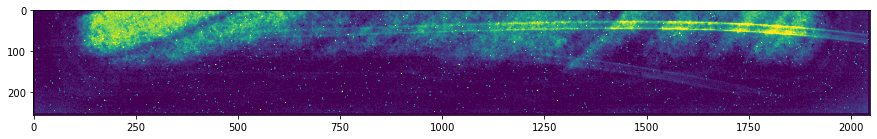

In [33]:
# Get data from SCI extension
w43 = fits.getdata('WASP43_NIS_SOSS_CLEAR_uncal.fits')

# Plot a frame
plt.figure(figsize=(15,5))
im = plt.imshow(w43[0,2,:,:])
im.set_clim(10000,20000)